# Importing Necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

training_set = train_datagen.flow_from_directory(
    'train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 20000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'test',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5000 images belonging to 2 classes.


In [6]:
images, labels = next(training_set)
print(images.shape)

(32, 64, 64, 3)


# Building the model

In [7]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history=model.fit(training_set,epochs=10,validation_data=test_set)

Train for 625 steps, validate for 157 steps
Epoch 1/10
625/625 [==============================] - 239s 382ms/step - loss: 0.6025 - accuracy: 0.6744 - val_loss: 0.5316 - val_accuracy: 0.7324
Epoch 2/10
625/625 [==============================] - 203s 325ms/step - loss: 0.4651 - accuracy: 0.7814 - val_loss: 0.4302 - val_accuracy: 0.8024
Epoch 3/10
625/625 [==============================] - 213s 341ms/step - loss: 0.3819 - accuracy: 0.8305 - val_loss: 0.5071 - val_accuracy: 0.7818
Epoch 4/10
625/625 [==============================] - 149s 238ms/step - loss: 0.3120 - accuracy: 0.8659 - val_loss: 0.4158 - val_accuracy: 0.8214
Epoch 5/10
625/625 [==============================] - 29s 47ms/step - loss: 0.2557 - accuracy: 0.8939 - val_loss: 0.3971 - val_accuracy: 0.8106
Epoch 6/10
625/625 [==============================] - 31s 49ms/step - loss: 0.2036 - accuracy: 0.9168 - val_loss: 0.3955 - val_accuracy: 0.8384
Epoch 7/10
625/625 [==============================] - 29s 47ms/step - loss: 0.1559 -

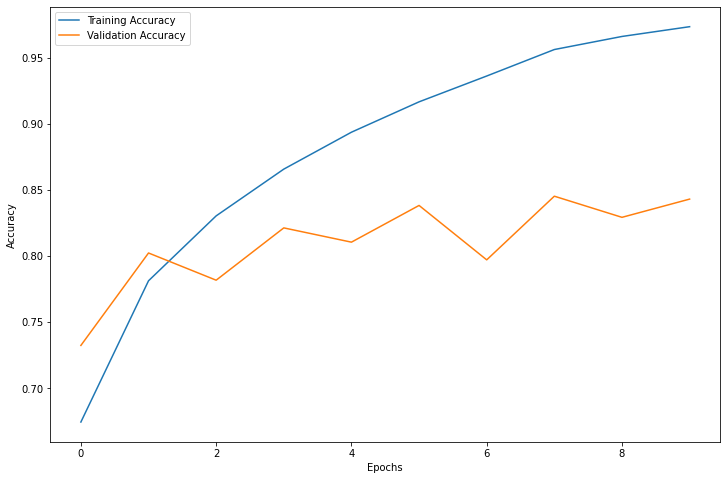

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Prediction

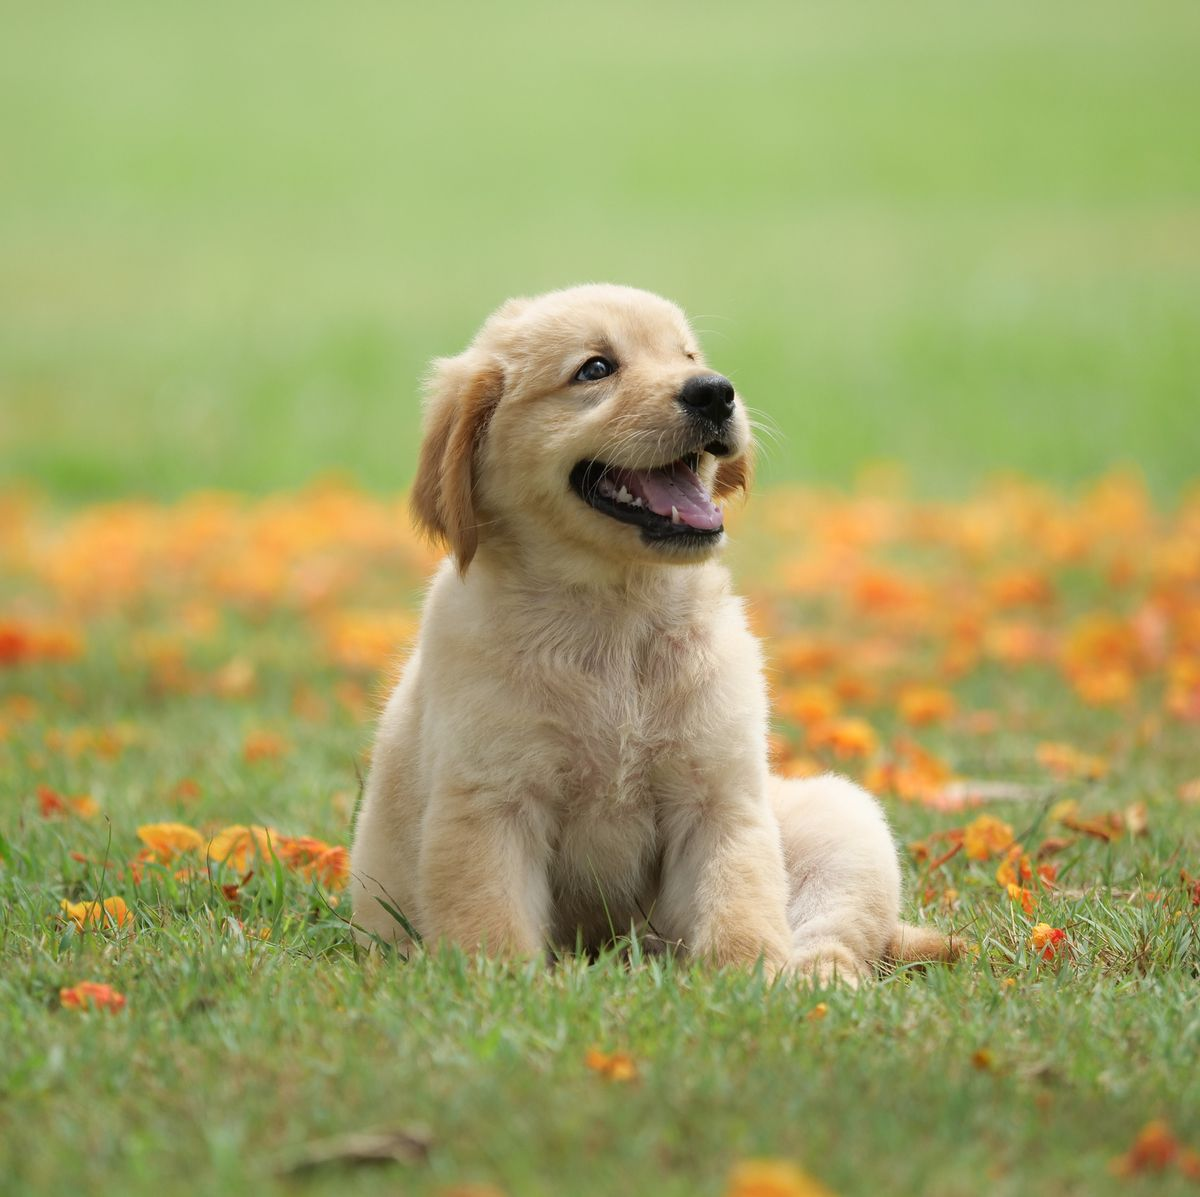

In [22]:
image = Image.open('assets\predict\dog.jpg')

display(image)

In [23]:
test_image = image.resize((64,64))

test_image_arr = np.array(test_image)
test_inp=test_image_arr.reshape((1,64,64,3))

In [24]:
test_inp = test_inp.astype('float32')  

test_inp /= 255.0 

In [25]:
prediction=model.predict(test_inp)
prediction

array([[0.99996066]], dtype=float32)

In [26]:
if(prediction<0.2):
    print("It is a image of a Cat")
elif(prediction>0.8):
    print("It is a image of a Dog")
else:
    print("Not sure")

It is a image of a Dog
